# HOUSE PRICE PREDICTION IN INDIA

## Load necessary libraries 

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data  

In [2]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [3]:
train_df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [4]:
train_df.shape

(29451, 12)

### Checking for missing values 

In [5]:
train_df.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


#### As we see the column of the address contains two parts. Let's divide this value and add a column of cities in the dataset.

In [7]:
train_df['ADDRESS_PART1'] = train_df['ADDRESS'].apply(lambda x: x.split(',')[0].strip())
train_df['CITY'] = train_df['ADDRESS'].apply(lambda x: x.split(',')[1].strip())

In [8]:
train_df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),ADDRESS_PART1,CITY
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Ksfc Layout,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Vishweshwara Nagar,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Jigani,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Sector-1 Vaishali,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,New Town,Kolkata


In [9]:
len(train_df['CITY'].unique()) 

424

### Check the correlation of columns 

In [10]:
train_df.corr()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
UNDER_CONSTRUCTION,1.000000,0.363826,-0.040712,-0.004204,-1.000000,-0.347405,0.006440,-0.000381,0.055399
RERA,0.363826,1.000000,0.009547,-0.006229,-0.363826,-0.270351,0.104976,-0.065106,0.067636
BHK_NO.,-0.040712,0.009547,1.000000,0.005303,0.040712,0.014581,0.068730,0.046930,0.112283
SQUARE_FT,-0.004204,-0.006229,0.005303,1.000000,0.004204,0.001732,-0.012591,0.000803,0.402685
READY_TO_MOVE,-1.000000,-0.363826,0.040712,0.004204,1.000000,0.347405,-0.006440,0.000381,-0.055399
RESALE,-0.347405,-0.270351,0.014581,0.001732,0.347405,1.000000,0.024038,0.014844,-0.207378
LONGITUDE,0.006440,0.104976,0.068730,-0.012591,-0.006440,0.024038,1.000000,-0.155062,-0.031112
LATITUDE,-0.000381,-0.065106,0.046930,0.000803,0.000381,0.014844,-0.155062,1.000000,-0.017254
TARGET(PRICE_IN_LACS),0.055399,0.067636,0.112283,0.402685,-0.055399,-0.207378,-0.031112,-0.017254,1.000000


<AxesSubplot:>

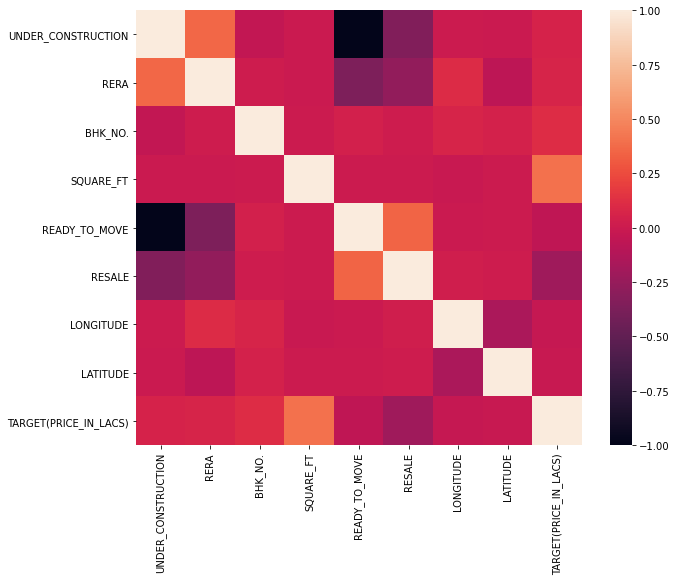

In [11]:
plt.figure(figsize = (10,8))
sns.heatmap(train_df.corr())

###  max value of correlation between price and square of flat

<AxesSubplot:ylabel='SQUARE_FT'>

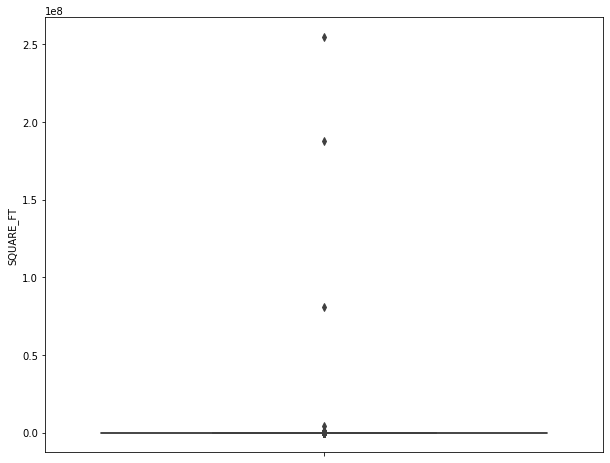

In [12]:
# Visualize the outliers by box plot
plt.figure(figsize= (10,8))
sns.boxplot(y = 'SQUARE_FT',data = train_df)


In [13]:
def get_outliers(df, column_name):
    
    IQR = df[column_name].quantile(0.75) - df[column_name].quantile(0.25)
    lower_sq_limit = df[column_name].quantile(0.25) - (IQR * 1.5)
    upper_sq_limit = df[column_name].quantile(0.75) + (IQR * 1.5)
    outliers = np.where(df[column_name] > upper_sq_limit, True,
    np.where(df[column_name] < lower_sq_limit, True, False))
    return outliers

In [14]:
sqr_ft_outliers = get_outliers(train_df, 'SQUARE_FT')
df_without_outliers = train_df.loc[~(sqr_ft_outliers),]
print(train_df.shape,df_without_outliers.shape)
        

(29451, 14) (27816, 14)


In [15]:
print("{} rows was been deleted".format(
    train_df.shape[0] - df_without_outliers.shape[0]))

1635 rows was been deleted


<AxesSubplot:ylabel='SQUARE_FT'>

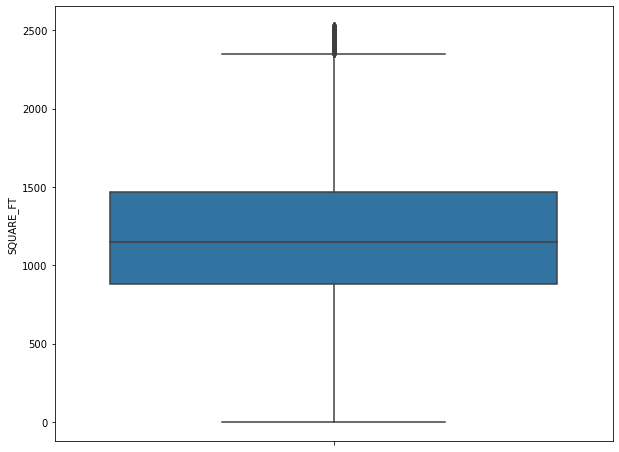

In [16]:
plt.figure(figsize=(10,8))
sns.boxplot(y='SQUARE_FT', data=df_without_outliers)

### Check in outliers in target column 

<AxesSubplot:ylabel='TARGET(PRICE_IN_LACS)'>

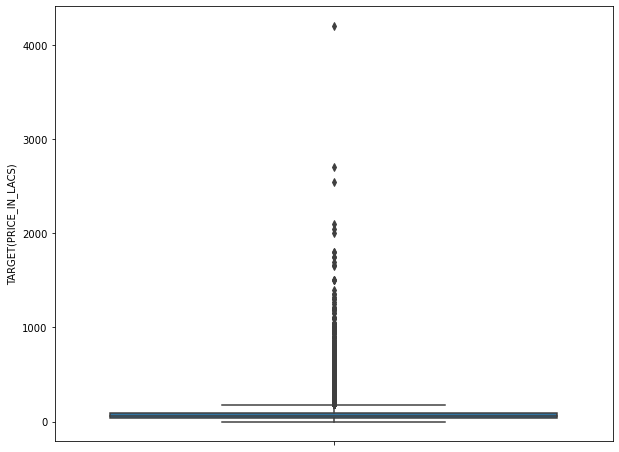

In [17]:
plt.figure(figsize=(10,8))
sns.boxplot(y='TARGET(PRICE_IN_LACS)', data=df_without_outliers)

In [18]:
price_outliers = get_outliers(df_without_outliers, 'TARGET(PRICE_IN_LACS)')
len(price_outliers)

27816

In [19]:
new_df = df_without_outliers.iloc[~(price_outliers),]
print(train_df.shape, new_df.shape)

(29451, 14) (25698, 14)


<AxesSubplot:ylabel='TARGET(PRICE_IN_LACS)'>

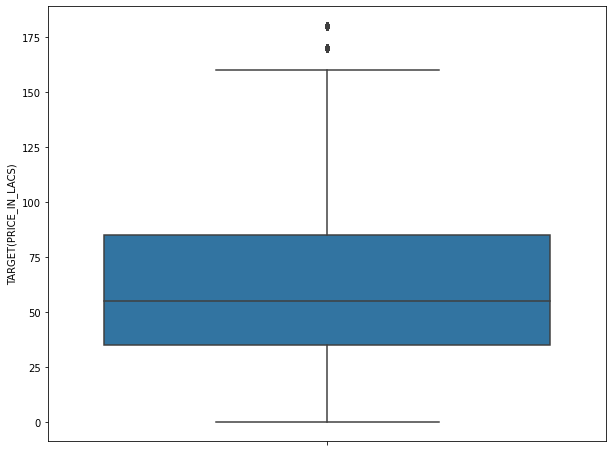

In [20]:
plt.figure(figsize=(10,8))
sns.boxplot(y='TARGET(PRICE_IN_LACS)',data = new_df)

In [21]:
new_df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),ADDRESS_PART1,CITY
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Ksfc Layout,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Vishweshwara Nagar,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Jigani,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Sector-1 Vaishali,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,New Town,Kolkata


In [22]:
print("{} rows was been deleted".format(train_df.shape[0] - new_df.shape[0]))

3753 rows was been deleted


In [23]:
new_df.index = np.arange(new_df.shape[0])
new_df.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            25688, 25689, 25690, 25691, 25692, 25693, 25694, 25695, 25696,
            25697],
           dtype='int64', length=25698)

### let's look to the city column 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Bangalore'),
  Text(1, 0, 'Ghaziabad'),
  Text(2, 0, 'Kolkata'),
  Text(3, 0, 'Jaipur'),
  Text(4, 0, 'Mohali'),
  Text(5, 0, 'Chennai'),
  Text(6, 0, 'Noida'),
  Text(7, 0, 'Bhubaneswar'),
  Text(8, 0, 'Pune'),
  Text(9, 0, 'Nagpur'),
  Text(10, 0, 'Faridabad'),
  Text(11, 0, 'Lalitpur'),
  Text(12, 0, 'Vadodara'),
  Text(13, 0, 'Maharashtra'),
  Text(14, 0, 'Lucknow'),
  Text(15, 0, 'Mumbai'),
  Text(16, 0, 'Indore'),
  Text(17, 0, 'Surat'),
  Text(18, 0, 'Gurgaon'),
  Text(19, 0, 'Chandigarh')])

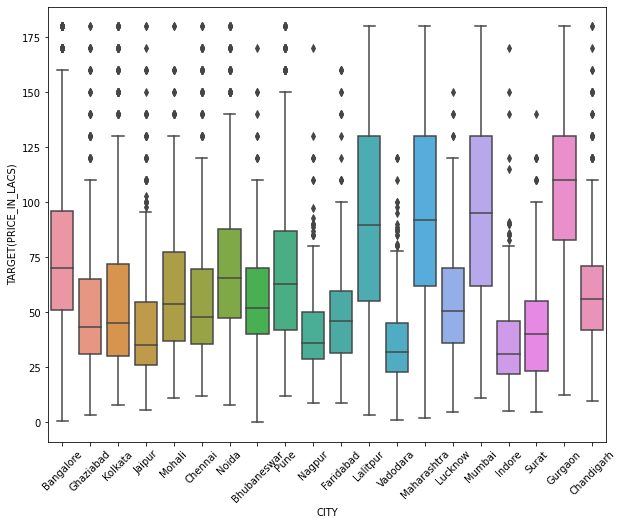

In [24]:
head_values = new_df['CITY'].value_counts().head(20).index.to_list()
head_city = new_df[new_df['CITY'].isin(head_values)]
plt.figure(figsize = (10,8))
sns.boxplot(y = 'TARGET(PRICE_IN_LACS)', x = 'CITY', data= head_city)
plt.xticks(rotation=45)

### We can see that CITY is an important feature for predicting model 

In [25]:
new_df.nunique()

POSTED_BY                    3
UNDER_CONSTRUCTION           2
RERA                         2
BHK_NO.                     10
BHK_OR_RK                    2
SQUARE_FT                16714
READY_TO_MOVE                2
RESALE                       2
ADDRESS                   6386
LONGITUDE                 3868
LATITUDE                  3861
TARGET(PRICE_IN_LACS)      932
ADDRESS_PART1             5544
CITY                       412
dtype: int64

In [26]:
new_df = pd.concat([new_df,pd.get_dummies(new_df['POSTED_BY'])],axis = 1)

In [27]:
new_df = pd.concat([new_df,pd.get_dummies(new_df['BHK_OR_RK'])],axis = 1)

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [29]:
le = LabelEncoder()
le.fit(new_df['CITY'])
new_df['NEW_CITY'] = le.transform(new_df['CITY'])

In [30]:
le.fit(new_df['ADDRESS_PART1'])
new_df['NEW_ADDRESS_PART1'] = le.transform(new_df['ADDRESS_PART1'])

In [31]:
new_df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,...,TARGET(PRICE_IN_LACS),ADDRESS_PART1,CITY,Builder,Dealer,Owner,BHK,RK,NEW_CITY,NEW_ADDRESS_PART1
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,...,55.0,Ksfc Layout,Bangalore,0,0,1,1,0,30,2263
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,...,51.0,Vishweshwara Nagar,Mysore,0,1,0,1,0,222,5273
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,...,43.0,Jigani,Bangalore,0,0,1,1,0,30,1812
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,...,62.5,Sector-1 Vaishali,Ghaziabad,0,0,1,1,0,111,4085
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,...,60.5,New Town,Kolkata,0,1,0,1,0,178,3082


In [32]:
new_df.drop(['POSTED_BY','BHK_OR_RK','ADDRESS','CITY','ADDRESS_PART1'],axis = 1 , inplace= True)

In [33]:
temp =  new_df[['SQUARE_FT','LONGITUDE','LATITUDE','TARGET(PRICE_IN_LACS)']]
scaler = StandardScaler()
scaler.fit(temp)
temp_scaled = scaler.transform(temp)
temp_scaled = pd.DataFrame(temp_scaled,columns = temp.columns)
temp_scaled

,SQUARE_FT,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,0.317699,-1.340832,0.048625,-0.240910
1,0.259722,-1.451291,-0.042567,-0.345200
2,-0.525607,-1.371312,0.051900,-0.553781
3,-0.533047,1.148712,0.024381,-0.045365
4,-0.374327,0.187660,1.090007,-0.097510
...,...,...,...,...
25693,3.073981,0.910173,0.091222,-0.501636
25694,-0.902210,2.944201,-15.614616,-1.257741
25695,-0.320035,0.876522,-0.120679,-0.968335
25696,-0.539576,-1.351914,0.300191,0.071961


In [34]:
new_df.drop(['SQUARE_FT','LONGITUDE', 'LATITUDE', 'TARGET(PRICE_IN_LACS)'],axis = 1)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,READY_TO_MOVE,RESALE,Builder,Dealer,Owner,BHK,RK,NEW_CITY,NEW_ADDRESS_PART1
0,0,0,2,1,1,0,0,1,1,0,30,2263
1,0,0,2,1,1,0,1,0,1,0,222,5273
2,0,0,2,1,1,0,0,1,1,0,30,1812
3,0,1,2,1,1,0,0,1,1,0,111,4085
4,1,0,2,0,1,0,1,0,1,0,178,3082
...,...,...,...,...,...,...,...,...,...,...,...,...
25693,0,0,3,1,1,0,0,1,1,0,4,4488
25694,0,0,2,1,1,0,0,1,1,0,190,1213
25695,0,0,2,1,1,0,1,0,1,0,143,127
25696,0,0,2,1,1,0,0,1,1,0,70,4566


# Final DATA

In [35]:
new_df

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),Builder,Dealer,Owner,BHK,RK,NEW_CITY,NEW_ADDRESS_PART1
0,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0,0,0,1,1,0,30,2263
1,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0,0,1,0,1,0,222,5273
2,0,0,2,933.159722,1,1,12.778033,77.632191,43.0,0,0,1,1,0,30,1812
3,0,1,2,929.921143,1,1,28.642300,77.344500,62.5,0,0,1,1,0,111,4085
4,1,0,2,999.009247,0,1,22.592200,88.484911,60.5,0,1,0,1,0,178,3082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25693,0,0,3,2500.000000,1,1,27.140626,78.043277,45.0,0,0,1,1,0,4,4488
25694,0,0,2,769.230769,1,1,39.945409,-86.150721,16.0,0,0,1,1,0,190,1213
25695,0,0,2,1022.641509,1,1,26.928785,75.828002,27.1,0,1,0,1,0,143,127
25696,0,0,2,927.079009,1,1,12.900150,80.227910,67.0,0,0,1,1,0,70,4566


In [36]:
X = new_df.loc[:, new_df.columns != 'TARGET(PRICE_IN_LACS)']
y = new_df['TARGET(PRICE_IN_LACS)']

In [37]:
from sklearn.model_selection import train_test_split, cross_val_score

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [39]:
X_train.shape,X_test.shape

((20558, 15), (5140, 15))

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

In [41]:
gbr = GradientBoostingRegressor(max_depth=9, n_estimators=154, max_features=6)

In [42]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=9, max_features=6, n_estimators=154)

In [43]:
gbr.score(X_test, y_test)

0.80492895096534

## Ploting the difference of real and predicted data

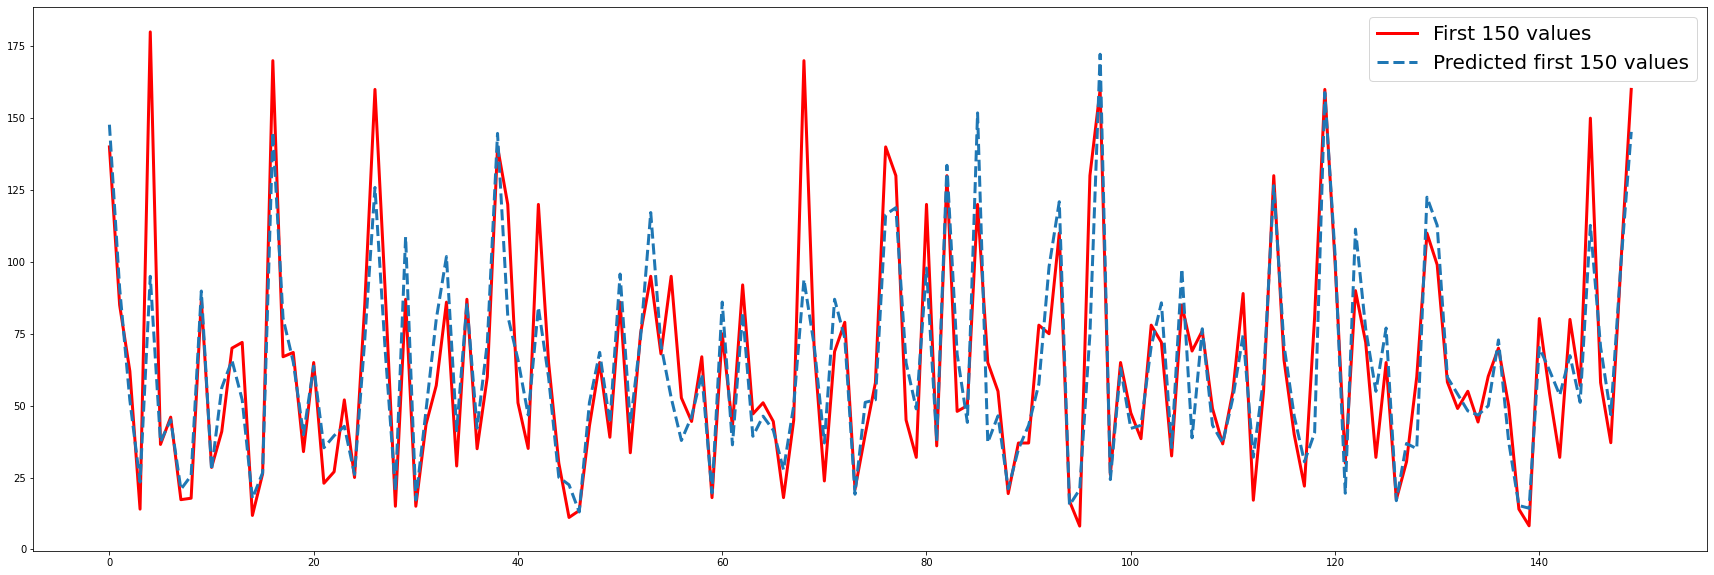

In [48]:
fig, ax = plt.subplots(figsize=(30, 10))
ax.plot(y_test.to_list()[:150], 
        label='First 150 values', color='red', linewidth=3)
ax.plot(gbr.predict(X_test)[:150], 
        label='Predicted first 150 values', 
        linestyle='dashed', linewidth=3)
ax.legend(prop={"size":20})

# THANKYOU